In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bot import sendMessage
    
from __future__ import print_function
import seaborn; seaborn.set()

In [3]:
r_train = pd.read_csv('data/r_train.csv', index_col=0)
r_test = pd.read_csv('data/r_test.csv', index_col=0)
r_target = pd.read_csv('data/target.csv', index_col=0)['0']

In [4]:
droplist = set(['ind_var6', 'saldo_medio_var17_hace3', 'delta_imp_trasp_var33_out_1y3', 
                'saldo_medio_var17_hace2', 'ind_var20_0', 'delta_imp_reemb_var33_1y3',
                'delta_imp_reemb_var13_1y3', 'num_var13_medio_0', 'ind_var20', 'ind_var18_0',
                'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'saldo_medio_var12_ult1',
                'delta_imp_aport_var13_1y3', 'delta_imp_venta_var44_1y3', 'saldo_medio_var17_ult3',
                'num_meses_var13_medio_ult3', 'delta_num_aport_var33_1y3', 'delta_num_aport_var17_1y3',
                'delta_num_compra_var44_1y3', 'imp_reemb_var33_ult1', 'delta_imp_trasp_var17_out_1y3',
                'imp_reemb_var17_hace3', 'ind_var34_0', 'delta_imp_trasp_var17_in_1y3'])

droplist = ['imp_op_var39_efect_ult3', 'num_op_var41_ult3', 'imp_op_var39_efect_ult1', 
            'delta_imp_aport_var13_1y3', 'delta_imp_reemb_var33_1y3', 'num_trasp_var33_out_ult1', 
            'ind_var18_0', 'delta_imp_reemb_var13_1y3', 'saldo_medio_var13_medio_ult3', 
            'ind_var20_0', 'imp_trasp_var17_in_hace3', 'num_op_var41_ult1', 'num_var1_0', 
            'num_var44', 'ind_var40_0', 'ind_var13_largo_0', 'num_var34_0', 'ind_var24', 
            'num_op_var41_efect_ult1', 'saldo_var24', 'imp_op_var41_ult1', 'ind_var20', 
            'ind_var39_0', 'num_var40', 'num_trasp_var17_in_ult1', 'num_var8_0', 
            'saldo_medio_var17_ult3', 'ind_var6_0', 'num_var8', 'num_var6', 'num_var13_medio_0', 
            'num_var4', 'ind_var14', 'num_var1', 'saldo_var1', 'saldo_medio_var33_ult3', 
            'num_reemb_var17_hace3', 'num_op_var41_efect_ult3', 'delta_num_venta_var44_1y3', 
            'delta_num_aport_var33_1y3', 'saldo_medio_var17_hace3', 'saldo_medio_var17_hace2', 
            'ind_var34_0', 'saldo_medio_var33_ult1', 'num_var45_ult3', 'saldo_medio_var12_ult1', 
            'num_var18_0', 'saldo_medio_var13_medio_hace2', 'num_reemb_var33_ult1', 'ind_var13_corto_0', 
            'ind_var13', 'num_op_var41_hace3', 'num_op_var41_hace2', 'ind_var7_emit_ult1', 
            'num_var12', 'saldo_medio_var13_largo_ult1', 'ind_var24_0', 'saldo_var17', 
            'num_var5', 'delta_num_compra_var44_1y3', 'saldo_var26', 'saldo_var34', 
            'saldo_medio_var13_corto_ult1', 'saldo_var13_corto', 'saldo_var18', 
            'delta_num_aport_var17_1y3', 'num_meses_var13_medio_ult3', 'num_trasp_var17_out_ult1', 
            'ind_var44_0', 'imp_trasp_var33_out_ult1', 'num_var40_0', 'ind_var1', 'num_var13_corto']
droplist = []

In [5]:
data = r_train.drop(droplist, axis=1)

In [6]:
%%time
dc = data.corr()

Wall time: 22.9 s


In [7]:
#Find correlations
def bad_feature_pairs(corr, columns, th):
    bad_fts = dict()
    bad_count = {ft:0 for ft in columns}
    for ft1 in columns:
        for ft2 in columns:
            if ft1 == ft2: 
                continue
            if corr[ft1][ft2] > th:
                pair = tuple(sorted([ft1, ft2]))
                if pair not in bad_fts:
                    bad_fts[pair] = corr[ft1][ft2]
                    bad_count[ft1] += 1
                    bad_count[ft2] += 1
    return bad_fts, bad_count

corr_th = .95
bad_fts, bad_count = bad_feature_pairs(dc, dc.columns, corr_th)
print(len(bad_fts))

148


In [8]:
for fts in sorted(bad_fts.keys(), key=lambda x: -bad_fts[x]):
    print(fts[0], fts[1], bad_fts[fts])

ind_var6 num_var6 1.00000000001
delta_imp_trasp_var33_out_1y3 num_trasp_var33_out_ult1 1.0
delta_imp_reemb_var33_1y3 num_reemb_var33_ult1 1.0
ind_var20_0 num_var20_0 1.0
delta_imp_reemb_var13_1y3 num_reemb_var13_ult1 1.0
ind_var20 num_var20 1.0
ind_var13_medio_0 num_var13_medio_0 1.0
num_meses_var13_medio_ult3 num_var13_medio_0 1.0
delta_imp_amort_var18_1y3 num_var18_0 1.0
ind_var18_0 num_var18_0 1.0
delta_imp_amort_var34_1y3 num_var34_0 1.0
delta_imp_aport_var13_1y3 delta_num_aport_var13_1y3 1.0
delta_imp_venta_var44_1y3 delta_num_venta_var44_1y3 1.0
delta_imp_aport_var33_1y3 delta_num_aport_var33_1y3 1.0
delta_imp_aport_var17_1y3 delta_num_aport_var17_1y3 1.0
ind_var13_medio_0 num_meses_var13_medio_ult3 1.0
delta_imp_compra_var44_1y3 delta_num_compra_var44_1y3 1.0
delta_imp_amort_var18_1y3 ind_var18_0 1.0
imp_reemb_var33_ult1 num_reemb_var33_ult1 1.0
delta_imp_trasp_var17_out_1y3 num_trasp_var17_out_ult1 1.0
imp_reemb_var17_hace3 num_reemb_var17_hace3 1.0
ind_var34_0 num_var34_0 1.0


In [9]:
for ft in sorted(bad_count, key=lambda x: -bad_count[x]):
    if bad_count[ft] > 0:
        print(ft, bad_count[ft])

saldo_var17 6
saldo_medio_var17_hace2 6
saldo_medio_var17_ult1 6
saldo_medio_var17_ult3 6
saldo_medio_var17_hace3 6
imp_aport_var17_hace3 6
saldo_var31 6
saldo_var24 4
saldo_medio_var12_ult1 4
saldo_var12 4
num_var13_corto 4
num_var13_corto_0 4
saldo_medio_var13_medio_hace2 4
ind_var13_corto_0 4
ind_var13_corto 4
saldo_medio_var12_ult3 4
saldo_var42 4
num_meses_var13_corto_ult3 4
num_var13_medio_0 3
num_var40 3
num_var1 3
num_var40_0 3
ind_var1 3
ind_var40_0 3
num_meses_var13_medio_ult3 3
ind_var13_medio_0 3
ind_var13_0 3
num_var1_0 3
ind_var40 3
ind_var1_0 3
num_var13 3
delta_imp_reemb_var33_1y3 2
ind_var13 2
ind_var12 2
saldo_var18 2
imp_trasp_var33_out_ult1 2
saldo_medio_var33_ult1 2
num_var6 2
num_reemb_var33_ult1 2
saldo_medio_var33_ult3 2
saldo_var13_corto 2
ind_var6 2
saldo_medio_var13_medio_ult3 2
num_trasp_var33_out_ult1 2
saldo_var1 2
saldo_var6 2
ind_var34_0 2
num_var13_0 2
saldo_medio_var13_corto_ult1 2
saldo_medio_var13_corto_ult3 2
ind_var18_0 2
imp_amort_var18_ult1 2
num

In [10]:
correlated = set(map(lambda x: x[0], bad_fts) + map(lambda x: x[1], bad_fts))
len(correlated)

173

In [11]:
to_drop = set()
drop_type = 'identical'
while True:
    bf, bc = bad_feature_pairs(dc, set(dc.columns).difference(to_drop), corr_th)
    #print(bc)
    if drop_type == 'identical':
        ident = filter(lambda x: bf[x] >= 1., bf.keys())
        if len(ident) == 0:
            break
        to_drop.add(ident[0][0])
        print(ident[0][0], bf[ident[0]])
    else:
        bcs = sorted(bc, key=lambda x: -bc[x])
        print(bcs[0], bc[bcs[0]])
        if bc[bcs[0]] == 0:
            break
        to_drop.add(bcs[0])
print(len(to_drop), to_drop)

delta_imp_venta_var44_1y3 1.0
delta_imp_reemb_var33_1y3 1.0
ind_var13_medio_0 1.0
delta_imp_aport_var13_1y3 1.0
ind_var20 1.0
delta_imp_aport_var33_1y3 1.0
delta_imp_amort_var34_1y3 1.0
ind_var6 1.00000000001
delta_imp_aport_var17_1y3 1.0
ind_var18_0 1.0
delta_imp_trasp_var33_out_1y3 1.0
delta_imp_amort_var18_1y3 1.0
ind_var20_0 1.0
num_meses_var13_medio_ult3 1.0
delta_imp_reemb_var13_1y3 1.0
15 set(['delta_imp_aport_var13_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_venta_var44_1y3', 'ind_var20', 'ind_var18_0', 'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_aport_var17_1y3', 'ind_var20_0', 'num_meses_var13_medio_ult3', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_amort_var18_1y3', 'ind_var13_medio_0', 'ind_var6', 'delta_imp_aport_var33_1y3'])


In [14]:
c_train = r_train.drop(to_drop, axis=1)
c_test = r_test.drop(to_drop, axis=1)
c_test.to_csv('./data/c_test.csv')
c_train.to_csv('./data/c_train.csv')

In [22]:
target = pd.read_csv('./data/target.csv', index_col=0)['0']
c_test = pd.read_csv('./data/c_test.csv', index_col=0)
c_train = pd.read_csv('./data/c_train.csv', index_col=0)

In [ ]:
data = pd.concat((c_train, c_test))
train_data = data.iloc[:len(c_train), :]

In [123]:
#select values with max %
values_max_fts = []
for col in data.columns:
    vc = data[col].value_counts()
    #print (vc.argmax(), vc.max(), vc[vc.argmax()])
    values_max_fts.append((col, vc.max() / float(len(data)), vc.argmax()))

In [125]:
map(print, sorted(values_max_fts, key=lambda x: -x[1])[:20]);

('imp_reemb_var17_hace3', 0.99999341403337771, 0.0)
('imp_reemb_var33_ult1', 0.99999341403337771, 0)
('num_reemb_var17_hace3', 0.99999341403337771, 0)
('num_reemb_var33_ult1', 0.99999341403337771, 0)
('saldo_medio_var29_hace3', 0.99999341403337771, 0.0)
('imp_trasp_var33_out_ult1', 0.99998682806675532, 0)
('num_trasp_var33_out_ult1', 0.99998682806675532, 0)
('num_var18_0', 0.99998024210013303, 0)
('saldo_var18', 0.99998024210013303, 0)
('imp_amort_var18_ult1', 0.99998024210013303, 0.0)
('ind_var34_0', 0.99997365613351075, 0)
('num_var6', 0.99997365613351075, 0)
('num_var34_0', 0.99997365613351075, 0)
('saldo_var6', 0.99997365613351075, 0.0)
('saldo_var34', 0.99997365613351075, 0)
('delta_imp_trasp_var17_out_1y3', 0.99997365613351075, 0)
('imp_amort_var34_ult1', 0.99997365613351075, 0.0)
('imp_trasp_var17_out_ult1', 0.99997365613351075, 0.0)
('num_trasp_var17_out_ult1', 0.99997365613351075, 0)
('imp_var7_emit_ult1', 0.99996707016688835, 0.0)


In [149]:
#find target mean for selected frequent values and for other values
from __future__ import division
tg_mean = target.mean()
#target.loc[np.where(train_data.n0 != 340)]
count_th = .99
mean_tg = []
for col, _, val in filter(lambda x: x[1] > count_th, values_max_fts):
    val_mean = target.loc[np.where(train_data[col] == val)].mean()
    other_mean = target.loc[np.where(train_data[col] != val)].mean()
    mean_tg.append((col, other_mean / tg_mean, val_mean / tg_mean))
map(print, sorted(mean_tg, key=lambda x: x[1])[:20]);

('ind_var6_0', 0.0, 1.00010524654002)
('ind_var33_0', 0.0, 1.0007503653094272)
('ind_var33', 0.0, 1.0006318117201076)
('ind_var34_0', 0.0, 1.0000263095582627)
('num_var6_0', 0.0, 1.00010524654002)
('num_var6', 0.0, 1.0000263095582627)
('num_var13_medio_0', 0.0, 1.0000263095582627)
('num_var18_0', 0.0, 1.0000263095582627)
('num_var20_0', 0.0, 1.003643852978454)
('num_var20', 0.0, 1.0027039504055926)
('num_op_var40_hace3', 0.0, 1.0000920895110046)
('num_var33_0', 0.0, 1.0007503653094272)
('num_var33', 0.0, 1.0006318117201076)
('num_var34_0', 0.0, 1.0000263095582627)
('saldo_var6', 0.0, 1.0000263095582627)
('saldo_var13_medio', 0.0, 1.0000263095582627)
('saldo_var18', 0.0, 1.0000263095582627)
('saldo_var20', 0.0, 1.0027039504055926)
('saldo_var33', 0.0, 1.0006318117201076)
('saldo_var34', 0.0, 1.0000263095582627)


In [150]:
to_drop2 = [col[0] for col in filter(lambda x: x[1] == 0, mean_tg)]
print(len(to_drop2), to_drop2)

79 ['ind_var6_0', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'num_var6_0', 'num_var6', 'num_var13_medio_0', 'num_var18_0', 'num_var20_0', 'num_var20', 'num_op_var40_hace3', 'num_var33_0', 'num_var33', 'num_var34_0', 'saldo_var6', 'saldo_var13_medio', 'saldo_var18', 'saldo_var20', 'saldo_var33', 'saldo_var34', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_num_aport_var33_1y3', 'delta_num_venta_var44_1y3', 'imp_amort_var18_ult1', 'imp_amort_var34_ult1', 'imp_aport_var17_hace3', 'imp_aport_var33_hace3', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_compra_var44_hace3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var17_in_ult1', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_ult1', 'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'ind_var7_emit_ult1', 'num_aport_var17_hace3', 'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num

In [175]:
data.shape

(151838, 292)

In [179]:
#binirzaing to_drop2
for col in to_drop2:
    val = data[col].value_counts().argmax()
    bin_col = (data[col] == val)
    data[col + '_bin'] = bin_col

In [180]:
data.shape

(151838, 371)

In [181]:
cc_data = data.drop(to_drop2, axis=1)
cc_train = cc_data.iloc[:len(c_train), :]
cc_test = cc_data.iloc[len(c_train):, :]
cc_test.to_csv('./data/cc_test.csv')
cc_train.to_csv('./data/cc_train.csv')

In [39]:
def devar(col):
    spl = col.split('_')
    for i in range(len(spl)):
        if spl[i].startswith('var'):
            spl[i] = 'varN'
    return '_'.join(spl)

from collections import Counter
Counter(map(devar, c_train.columns));

In [34]:
uniqs = c_train.apply(lambda x: len(x.unique())).sort_values(ascending=False)

#map(print, [(col, len(c_train[col].unique())) for col in c_train.columns])
uniqs

var38                            57736
saldo_medio_var5_ult3            17330
saldo_var30                      16940
saldo_var42                      15730
saldo_medio_var5_ult1            14778
saldo_medio_var5_hace2           14486
saldo_var5                       11642
imp_op_var39_comer_ult3           9099
imp_op_var41_comer_ult3           8961
imp_op_var39_ult1                 8149
imp_op_var41_ult1                 8032
saldo_medio_var5_hace3            7787
imp_op_var39_comer_ult1           7551
imp_op_var41_comer_ult1           7421
saldo_var37                       4041
imp_trans_var37_ult1              3831
saldo_medio_var12_ult3            3447
saldo_medio_var12_ult1            3405
saldo_var12                       3059
saldo_medio_var12_hace2           2834
saldo_var24                       2614
saldo_medio_var13_corto_ult3      2576
imp_var43_emit_ult1               2342
saldo_medio_var8_ult3             2173
saldo_medio_var8_ult1             2116
saldo_var8               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017F8CE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000189EC518>]], dtype=object)

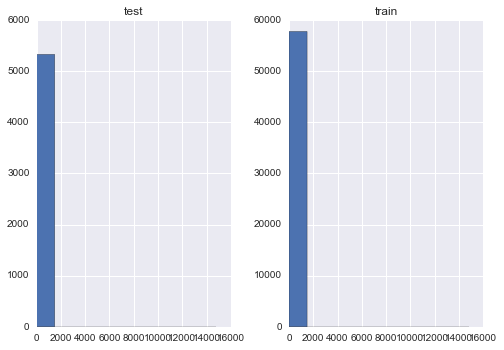

In [41]:
var38vc = pd.DataFrame()
var38vc['train'] = c_train.var38.value_counts()
var38vc['test'] = c_test.var38.value_counts()
var38vc.hist()

In [16]:
def smooth_target_mean(train, test, target, C):
    
    res = np.zeros(test.shape)
        
    mean_target = target.mean()
    #print(Xtest)
    for val in train.unique():
        cat_size = train.value_counts()[val]
        cat_mean = target.iloc[np.where(train == val)].mean()
        #print(val, cat_size, cat_mean)
        res[np.where(test == val)] = float(cat_mean * cat_size + mean_target * C) / float(cat_size + C)
        #print(cv_res)
    return res

In [14]:
def smooth_target_mean_cv(train, target, C, cv=None):
    if cv == None:
        cv = [([x for x in range(len(train))], [x for x in range(len(train))])]
    if type(cv) == int:
        from sklearn.cross_validation import StratifiedKFold
        cv = StratifiedKFold(target, cv)
    #(среднее значение * размер категории + глобальное среднее значение * C) / (размер категории + С)
    res = np.zeros(train.shape)
    for trx, tsx in cv:
        Xtrain, Ytrain = train.iloc[trx], target.iloc[trx]
        Xtest, Ytest = train.iloc[tsx], target.iloc[tsx]
        #print(Xtrain.shape, type(Xtrain), Ytrain.shape, type(Ytrain))
        
        mean_target = Ytrain.mean()
        cv_res = res[tsx]
        #print(Xtest)
        for val in Xtrain.unique():
            cat_size = Xtrain.value_counts()[val]
            cat_mean = Ytrain.iloc[np.where(Xtrain == val)].mean()
            #print(val, cat_size, cat_mean)
            cv_res[np.where(Xtest == val)] = float(cat_mean * cat_size + mean_target * C) / float(cat_size + C)
            #print(cv_res)
        res[tsx] = cv_res
    return res

In [244]:
%%time
a = pd.Series(['a', 'a', 'a', 'b', 'b', 'b'])
b = pd.Series([1, 2, 3, 4, 5, 6])

print(b[a == 'c'])

for col in c_train.columns:
    c_train[col + '_stm'] = smooth_target_mean_cv(c_train[col], target, 20, 10)
    print(col, end=' ')

Series([], dtype: int64)
var3 var15 imp_ent_var16_ult1 imp_op_var39_comer_ult1 imp_op_var39_comer_ult3 imp_op_var40_comer_ult1 imp_op_var40_comer_ult3 imp_op_var40_efect_ult1 imp_op_var40_efect_ult3 imp_op_var40_ult1 imp_op_var41_comer_ult1 imp_op_var41_comer_ult3 imp_op_var41_efect_ult1 imp_op_var41_efect_ult3 imp_op_var41_ult1 imp_op_var39_efect_ult1 imp_op_var39_efect_ult3 imp_op_var39_ult1 imp_sal_var16_ult1 ind_var1_0 ind_var1 ind_var5_0 ind_var5 ind_var6_0 ind_var8_0 ind_var8 ind_var12_0 ind_var12 ind_var13_0 ind_var13_corto_0 ind_var13_corto ind_var13_largo_0 ind_var13_largo ind_var13 ind_var14_0 ind_var14 ind_var17_0 ind_var17 ind_var19 ind_var24_0 ind_var24 ind_var25_cte ind_var26_0 ind_var26_cte ind_var25_0 ind_var30_0 ind_var30 ind_var31_0 ind_var31 ind_var32_cte ind_var32_0 ind_var33_0 ind_var33 ind_var34_0 ind_var37_cte ind_var37_0 ind_var39_0 ind_var40_0 ind_var40 ind_var41_0 ind_var44_0 ind_var44 num_var1_0 num_var1 num_var4 num_var5_0 num_var5 num_var6_0 num_var6 num_va

In [247]:
sendMessage('olou')
c_train.to_csv('./data/stm_train.csv')

In [18]:
%%time
for col in c_test.columns[:]:
    c_test[col + '_stm'] = smooth_target_mean(c_train[col], c_test[col], target, 20)
    print(col, end=' ')

var3 var15 imp_ent_var16_ult1 imp_op_var39_comer_ult1 imp_op_var39_comer_ult3 imp_op_var40_comer_ult1 imp_op_var40_comer_ult3 imp_op_var40_efect_ult1 imp_op_var40_efect_ult3 imp_op_var40_ult1 imp_op_var41_comer_ult1 imp_op_var41_comer_ult3 imp_op_var41_efect_ult1 imp_op_var41_efect_ult3 imp_op_var41_ult1 imp_op_var39_efect_ult1 imp_op_var39_efect_ult3 imp_op_var39_ult1 imp_sal_var16_ult1 ind_var1_0 ind_var1 ind_var5_0 ind_var5 ind_var6_0 ind_var8_0 ind_var8 ind_var12_0 ind_var12 ind_var13_0 ind_var13_corto_0 ind_var13_corto ind_var13_largo_0 ind_var13_largo ind_var13 ind_var14_0 ind_var14 ind_var17_0 ind_var17 ind_var19 ind_var24_0 ind_var24 ind_var25_cte ind_var26_0 ind_var26_cte ind_var25_0 ind_var30_0 ind_var30 ind_var31_0 ind_var31 ind_var32_cte ind_var32_0 ind_var33_0 ind_var33 ind_var34_0 ind_var37_cte ind_var37_0 ind_var39_0 ind_var40_0 ind_var40 ind_var41_0 ind_var44_0 ind_var44 num_var1_0 num_var1 num_var4 num_var5_0 num_var5 num_var6_0 num_var6 num_var8_0 num_var8 num_var12_0

KeyError: 'var3_stm'

In [ ]:
drop_stm = filter(lambda x: x.endswith('_stm_stm'), c_test.columns)

In [19]:
c_test.shape

(75818, 584)

In [21]:
sendMessage('olou')
c_test.to_csv('./data/stm_test.csv')

In [19]:
%%time
params = [(col, c_train[col], c_test[col], target, 20) for col in c_test.columns[:4]]

Wall time: 1e+03 µs


In [ ]:
import multiprocessing as mp
pool = mp.Pool(4)
def zip_smt(args):
    return args[0], smooth_mean_target(*args[1:])

try:
    res = pool.map(zip_smt, params)
    for col, feat in res:
        c_test[col + '_stm'] = feat
finally:
    pool.terminate()
    pool.stop()
    del pool